In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
import pandas_datareader as pdr
from pandas_datareader import data
import datetime as dt
#!pip install pandas-datareader
import requests
import json
#!pip install matplotlib


In [ ]:
df = pd.read_csv('cosmetics.csv')
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


# New Section

In [ ]:
df1=df[["Label","Brand","Name","Price","Ingredients","Rank"]]
df1

,Label,Brand,Name,Price,Ingredients,Rank
0,Moisturizer,LA MER,Crème de la Mer,175,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",4.1
1,Moisturizer,SK-II,Facial Treatment Essence,179,"Galactomyces Ferment Filtrate (Pitera), Butyle...",4.1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",4.4
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",3.8
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,"Water, Snail Secretion Filtrate, Phenyl Trimet...",4.1
...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,"Water, Alcohol Denat., Potassium Cetyl Phospha...",3.9
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",3.6
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",3.5
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",1.0


In [ ]:
print(df1.columns)


Index(['Label', 'Brand', 'Name', 'Price', 'Ingredients', 'Rank'], dtype='object')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Ingredients  1472 non-null   object 
 5   Rank         1472 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 69.1+ KB


In [ ]:
#Calculate the total sales for each Brand
brand_sales = df.groupby('Brand')['Price'].sum().sort_values(ascending=False)
brand_sales

Brand
LA MER                     5530
SHISEIDO                   4527
FRESH                      3308
PETER THOMAS ROTH          2761
SK-II                      2668
                           ... 
MAKEUP ERASER                20
NUFACE                       20
CLARISONIC                   19
TOO FACED                    17
FENTY BEAUTY BY RIHANNA      16
Name: Price, Length: 116, dtype: int64

In [ ]:
#Select the top brands to include in the pie chart
top_brands = brand_sales.head(10)
top_brands

Brand
LA MER               5530
SHISEIDO             4527
FRESH                3308
PETER THOMAS ROTH    2761
SK-II                2668
MURAD                2579
CLINIQUE             2575
DIOR                 2572
PERRICONE MD         2564
LANCÔME              2360
Name: Price, dtype: int64

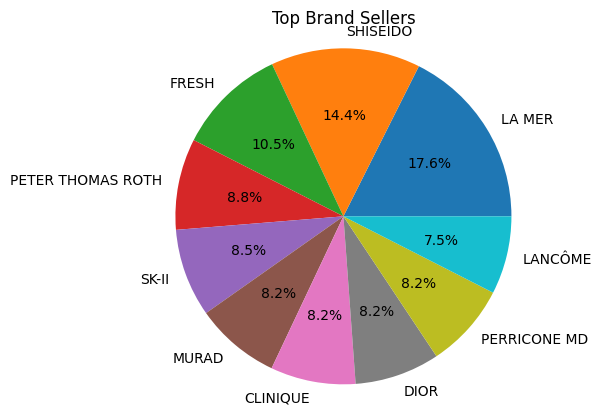

In [ ]:
#Create the pie chart
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%')
plt.title('Top Brand Sellers')
plt.axis('equal')
plt.show()


In [ ]:
#Calculate the count of each brand category:
Brand_counts = df1['Brand'].value_counts()
Brand_counts

CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
                      ..
SON & PARK             1
MAKEUP ERASER          1
KAT VON D              1
NURSE JAMIE            1
DERMAFLASH             1
Name: Brand, Length: 116, dtype: int64

In [ ]:
#Analyze ingredient patterns:
#Extract relevant information from the ingredients column:

Ingredient_counts = df1['Ingredients'].str.split(expand=True).stack().value_counts()
Ingredient_counts
#.value_counts() splits the ingredients column into individual words and counts the frequency of each word.
# The value_counts() function provides a count of each unique word.

Extract,      5089
,             3916
Sodium        2406
Oil,          1905
Glycol,       1656
              ... 
An-              1
themis           1
Spica-           1
tus              1
DERMAFLASH       1
Length: 7602, dtype: int64

In [ ]:
# create a function to categorize ingredients based on certain properties or characteristics.
# ingredients as "natural," "organic,"or any other relevant categories
def categorize_ingredients(Ingredient):
    if 'organic' in Ingredient:
        return 'organic'
    elif 'natural' in Ingredient:
        return 'natural'
    else:
        return 'other'

df1['Ingredient_Category'] = df1['Ingredients'].apply(categorize_ingredients).copy()
df1.head(10)

<ipython-input-13-4572e9849ea4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ingredient_Category'] = df1['Ingredients'].apply(categorize_ingredients).copy()


,Label,Brand,Name,Price,Ingredients,Rank,Ingredient_Category
0,Moisturizer,LA MER,Crème de la Mer,175,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",4.1,other
1,Moisturizer,SK-II,Facial Treatment Essence,179,"Galactomyces Ferment Filtrate (Pitera), Butyle...",4.1,other
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",4.4,other
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",3.8,other
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,"Water, Snail Secretion Filtrate, Phenyl Trimet...",4.1,other
5,Moisturizer,TATCHA,The Water Cream,68,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",4.2,other
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,"Water, Glycerin, Caprylic/ Capric Triglyceride...",4.2,other
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,100% Unrefined Sclerocraya Birrea (Marula) Ker...,4.4,other
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",4.4,other
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",5.0,other


In [ ]:
#This code is displaying  the count of ingredients in each category.
#giving us an overview of how the ingredients are distributed among different categories.
category_counts = df1['Ingredient_Category'].value_counts()
print(category_counts)


other      1442
natural      24
organic       6
Name: Ingredient_Category, dtype: int64


In [ ]:
category_by_brand = df1.groupby('Brand')['Ingredient_Category'].value_counts()
category_by_brand
#This code snippets is providing insights into the distribution of ingredient categories within each brand category.

Brand                Ingredient_Category
ALGENIST             other                  27
AMOREPACIFIC         other                  21
ANTHONY              other                   3
APIVITA              organic                 1
BAREMINERALS         other                   6
                                            ..
VITA LIBERATA        other                   2
VOLITION BEAUTY      other                   5
WANDER BEAUTY        other                   2
YOUTH TO THE PEOPLE  other                   7
YVES SAINT LAURENT   other                   1
Name: Ingredient_Category, Length: 127, dtype: int64

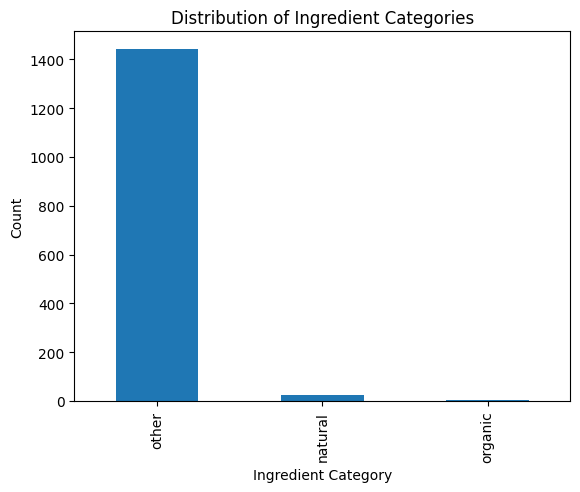

In [ ]:
#Creating visualizations can help to better understand the ingredient categories.
#creat a plot chart to visualize the distribution of ingredient categories:
df1['Ingredient_Category'].value_counts().plot(kind='bar')
plt.xlabel('Ingredient Category')
plt.ylabel('Count')
plt.title('Distribution of Ingredient Categories')
plt.show()


In [ ]:
#Compare the average prices of different Brands categories:
brand_avg_prices = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
brand_avg_prices


Brand
LA MER                           184.333333
BIOEFFECT                        171.250000
LIGHTSTIM                        169.000000
SK-II                            156.941176
LANCER                           135.833333
                                    ...    
TOO FACED                         17.000000
FENTY BEAUTY BY RIHANNA           16.000000
ST. TROPEZ TANNING ESSENTIALS     14.500000
TOO COOL FOR SCHOOL               12.857143
SEPHORA COLLECTION                 9.681818
Name: Price, Length: 116, dtype: float64

In [ ]:
#Examine (ingredient) patterns across brands or product categories:
Ingredient_patterns_by_Brand = df.groupby('Brand')['Ingredients'].apply(lambda x: ' '.join(x)).str.split(expand=True).stack().value_counts()
Ingredient_patterns_by_Brand
#This code groups the DataFrame by the 'Brand' column, combines all the ingredients within each Brand into a single string,
#and then counts the frequency of each ingredient.

Extract,          5089
,                 3916
Sodium            2406
Oil,              1905
Glycol,           1656
                  ... 
(Paraguay            1
Riboflavin           1
Paraguariensis       1
llex                 1
protects,            1
Length: 7602, dtype: int64

count    1472.000000
mean        4.153261
std         0.633918
min         0.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rank, dtype: float64


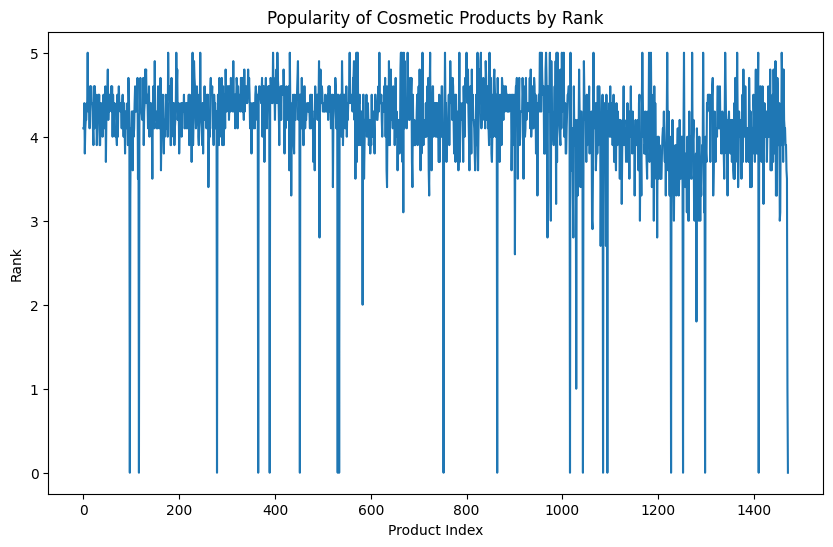

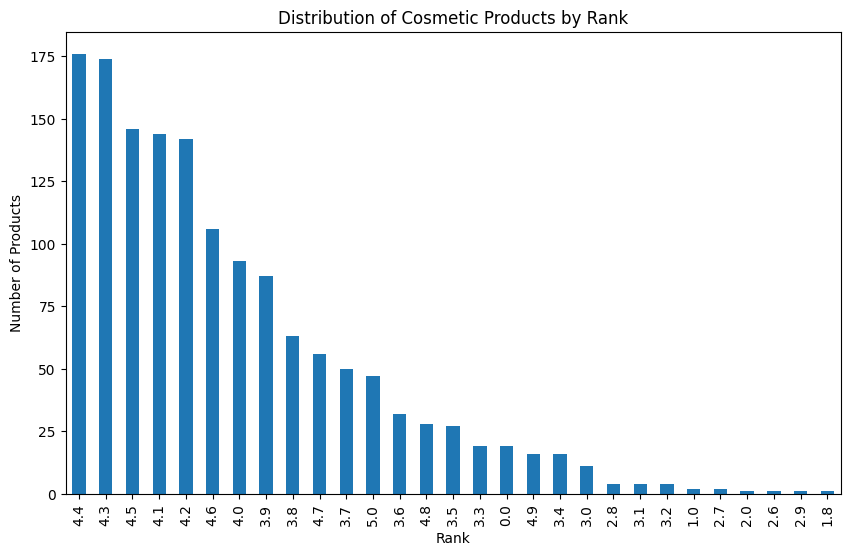

In [ ]:
# DataFrame named 'df1' with columns: 'Rank', 'Brand',
# Data Exploration
rank_stats = df1['Rank'].describe()
print(rank_stats)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(df1['Rank'])
plt.xlabel('Product Index')
plt.ylabel('Rank')
plt.title('Popularity of Cosmetic Products by Rank')
plt.show()

plt.figure(figsize=(10, 6))
df1['Rank'].value_counts().plot(kind='bar')
plt.xlabel('Rank')
plt.ylabel('Number of Products')
plt.title('Distribution of Cosmetic Products by Rank')
plt.show()

# Statistical Analysis
#yousing statistical tests or calculations to analyze the significance of rank differences among different attributes (e.g., brand, price range, ingredient category)

# Interpretation
# Analyze the visualizations and statistical analysis results to identify patterns or trends in the popularity of cosmetic products based on their rank


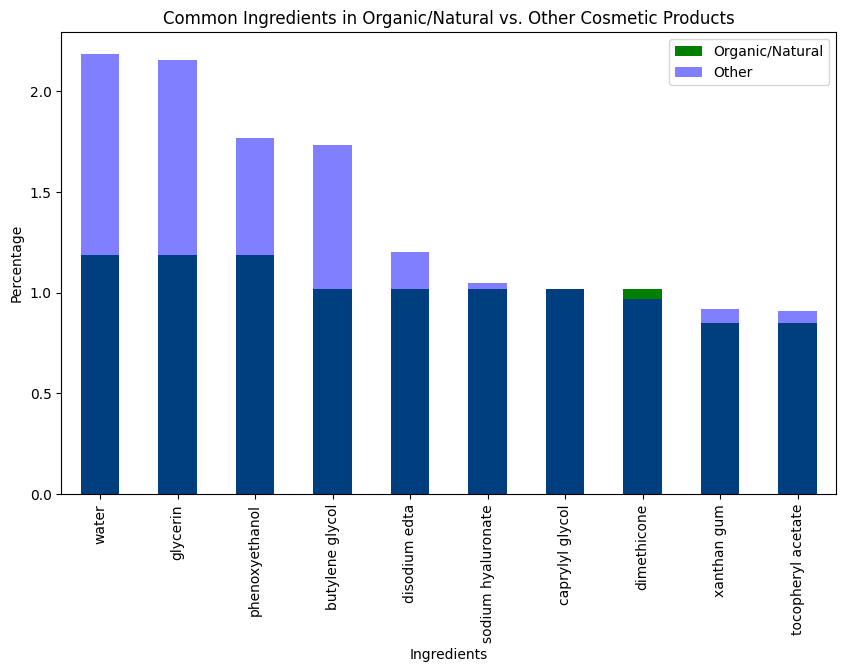

In [ ]:
# DataFrame named 'df1' with columns: 'Ingredients' and 'Ingredient_Category'

# Filter Data
organic_natural_df1 = df1[df1['Ingredient_Category'].isin(['organic', 'natural'])]
other_df1 = df1[df1['Ingredient_Category'] == 'other']

# Extract Ingredient Frequencies
organic_natural_ingredients_freq = organic_natural_df1['Ingredients'].str.lower().str.split(',').explode().str.strip().value_counts()
other_ingredients_freq = other_df1['Ingredients'].str.lower().str.split(',').explode().str.strip().value_counts()

# Comparison
organic_natural_ingredients_percentage = (organic_natural_ingredients_freq / organic_natural_ingredients_freq.sum()) * 100
other_ingredients_percentage = (other_ingredients_freq / other_ingredients_freq.sum()) * 100

# Visualization - Bar Chart
plt.figure(figsize=(10, 6))
organic_natural_ingredients_percentage[:10].plot(kind='bar', color='green', label='Organic/Natural')
other_ingredients_percentage[:10].plot(kind='bar', color='blue', alpha=0.5, label='Other')
plt.xlabel('Ingredients')
plt.ylabel('Percentage')
plt.title('Common Ingredients in Organic/Natural vs. Other Cosmetic Products')
plt.legend()
plt.show()

# Analyze the bar chart to identify specific ingredients that are more commonly used in organic or natural cosmetic products
# compared to other products


In [ ]:
#DataFrame named 'df1' with the relevant columns, including 'Brand'

# Count the number of products for each brand
brand_counts = df1['Brand'].value_counts()

# Get the brand with the highest number of products
highest_count_brand = brand_counts.idxmax()

# Print the brand with the highest number of products
print("The brand with the highest number of products is:", highest_count_brand)


The brand with the highest number of products is: CLINIQUE


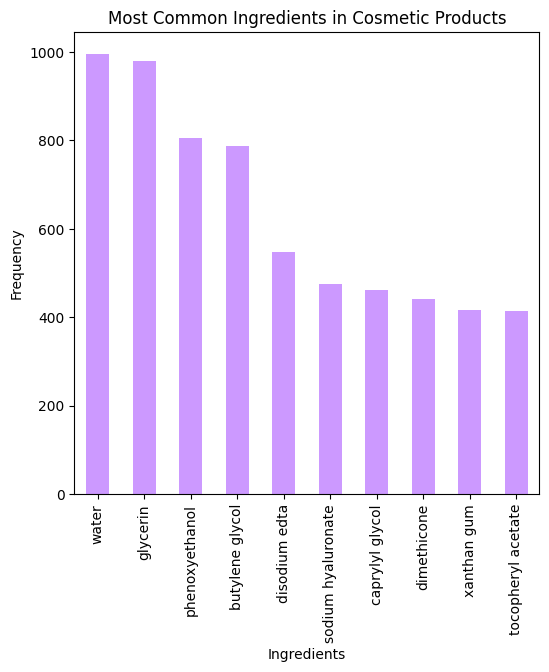

In [ ]:
# DataFrame named 'df1' with the column 'Ingredients'

# Extract Ingredient Frequencies
ingredient_freq = df1['Ingredients'].str.lower().str.split(',').explode().str.strip().value_counts()

# Visualization - Bar Chart
plt.figure(figsize=(6, 6))
ingredient_freq[:10].plot(kind='bar', color='#CC99FF')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Most Common Ingredients in Cosmetic Products')
plt.show()

# Interpretation
# Analyze the bar chart to identify the most common ingredients found in cosmetic products


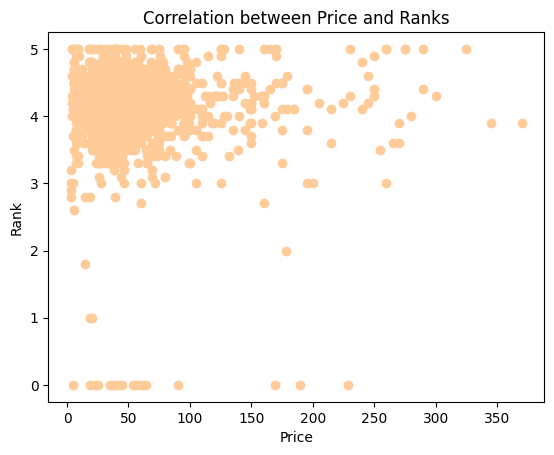

Correlation Coefficient:  -0.025214717679718862


In [ ]:
# DataFrame named 'df1' with columns: 'Price' and 'Customer_Ratings'

# Calculate the correlation coefficient
correlation = df1['Price'].corr(df1['Rank'])

# Create a scatter plot to visualize the relationship between price and customer ratings(instead i used Rank)
plt.scatter(df1['Price'], df1['Rank'], color="#FFCC99")
plt.xlabel('Price')
plt.ylabel('Rank')
plt.title('Correlation between Price and Ranks')
plt.show()

# Print the correlation coefficient
print("Correlation Coefficient: ", correlation)


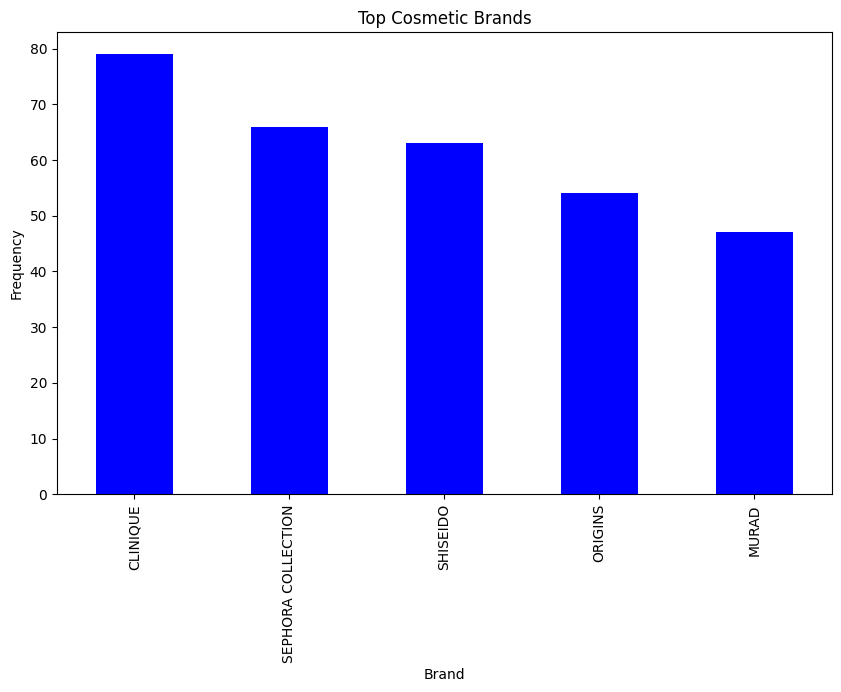

In [ ]:
#  DataFrame named 'df1' with the column 'Brand'

# Calculate Brand Frequencies
brand_freq = df1['Brand'].value_counts()

# Select Top Brands
top_brands = brand_freq.head(5)

# Visualization - Bar Chart
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='blue')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Top Cosmetic Brands')
plt.show()

# Interpretation
# Analyze the bar chart to identify the top cosmetic brands


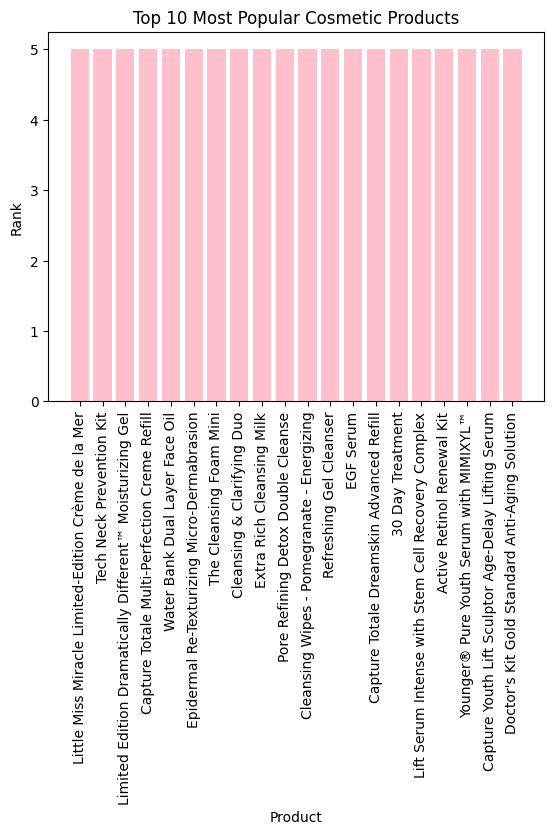

In [34]:
#quesion1-What are the most popular cosmetic products?

#.Bar chart: Show the top 10 most popular products based on their rank or customer ratings.

# Get the top 10 most popular products based on rank or customer ratings
top_10_popular_products = df1.nlargest(20, 'Rank')
# Plotting the top 20 most popular products
plt.bar(top_10_popular_products['Name'], top_10_popular_products['Rank'], color="pink")
plt.xlabel('Product')
plt.ylabel('Rank')
plt.title('Top 10 Most Popular Cosmetic Products')
plt.xticks(rotation=90)
plt.show()


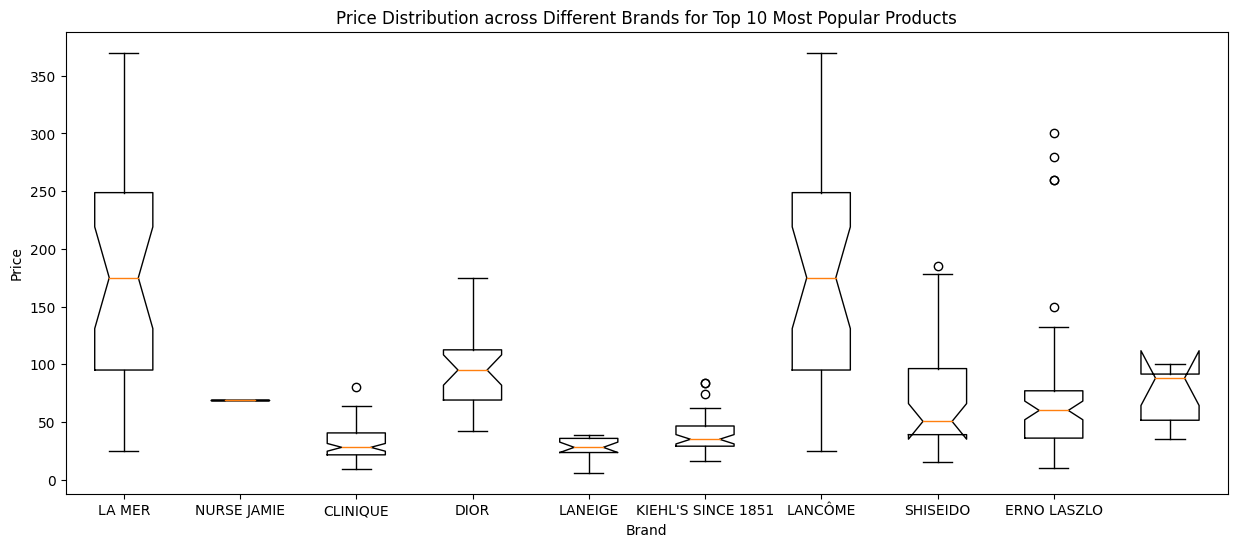

In [ ]:
#question2:Are there any notable differences in the attributes (price, ingredients) of the top 10 most popular products from different brands?

#.Box plot: Compare the price distribution across different brands.

# Get the top 10 most popular products based on rank or customer ratings
top_10_popular = df1.nlargest(10, 'Rank')
# Box plot: Compare the price distribution across different brands
plt.figure(figsize=(15,6))
plt.boxplot([df[df['Brand'] == brand]['Price'] for brand in top_10_popular['Brand']],"#FF99CC")
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Distribution across Different Brands for Top 10 Most Popular Products')
plt.xticks(range(1, len(top_10_popular['Brand'].unique()) + 1), top_10_popular['Brand'].unique())
plt.show()



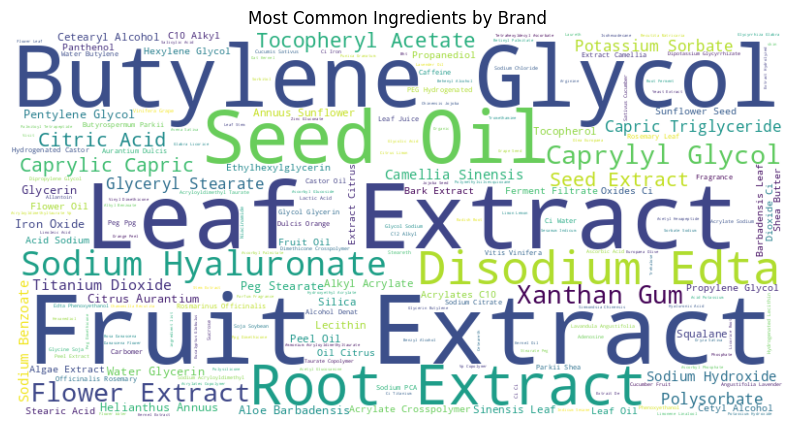

In [ ]:
#.Word cloud: Visualize the most common ingredients used by different brands.
# Generate a word cloud of the most common ingredients used by different brands
from wordcloud import WordCloud
brand_ingredients = df1.groupby('Brand')['Ingredients'].apply(lambda x: ' '.join(x)).reset_index()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(brand_ingredients['Ingredients']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Ingredients by Brand')
plt.show()


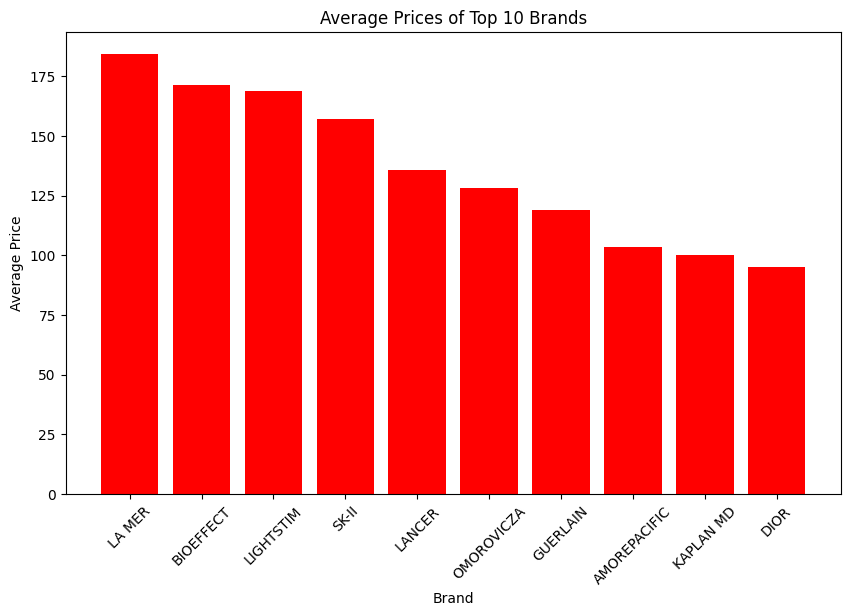

In [ ]:
# Group the data by brand and calculate the average price for each brand
average_prices = df1.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Select the top N brands you want to compare
top_n = 10
top_brands = average_prices[:top_n]

# Create a bar chart to compare the average prices
plt.figure(figsize=(10, 6))
plt.bar(top_brands.index, top_brands.values, color='red')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Prices of Top {} Brands'.format(top_n))
plt.xticks(rotation=45)
plt.show()


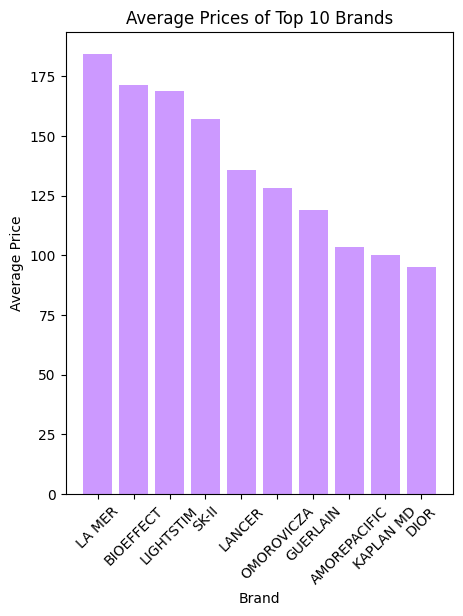

Brand with the highest average price:  LA MER
Highest Average Price:  184.33333333333334


In [ ]:
# Group the data by brand and calculate the average price for each brand
average_prices = df1.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Select the top 10 brands
top_brands = average_prices.head(10)

# Get the brand with the highest average price
highest_price_brand = top_brands.idxmax()
highest_price = top_brands.max()

# Create a bar chart to compare the average prices
plt.figure(figsize=(5, 6))
plt.bar(top_brands.index, top_brands.values, color='#CC99FF')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Prices of Top 10 Brands')
plt.xticks(rotation=45)
plt.show()

# Print the brand with the highest average price
print("Brand with the highest average price: ", highest_price_brand)
print("Highest Average Price: ", highest_price)


In [ ]:
# Group the data by brand and calculate the average price for each brand
average_prices = df1.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Select the top 10 brands
top_brands = average_prices.head(10)

# Print the summary of the top 10 brands
print("Summarize of the Top 10 Brands based on Average Prices:")
for rank, brand in enumerate(top_brands.index, 1):
    average_price = top_brands[brand]
    print(f"{rank}. {brand}: {average_price}")

# Get the brand with the highest average price
highest_price_brand = top_brands.idxmax()
highest_price = top_brands.max()

# Print the brand with the highest average price separately
print("\nBrand with the highest average price: ", highest_price_brand)
print("Highest Average Price: ", highest_price)


Summarize of the Top 10 Brands based on Average Prices:
1. LA MER: 184.33333333333334
2. BIOEFFECT: 171.25
3. LIGHTSTIM: 169.0
4. SK-II: 156.94117647058823
5. LANCER: 135.83333333333334
6. OMOROVICZA: 128.0
7. GUERLAIN: 118.83333333333333
8. AMOREPACIFIC: 103.52380952380952
9. KAPLAN MD: 100.0
10. DIOR: 95.25925925925925

Brand with the highest average price:  LA MER
Highest Average Price:  184.33333333333334


In [ ]:
from collections import Counter

# Concatenate all ingredients across brands into a single string
all_ingredients = ' '.join(df1['Ingredients'])

# Split the string into individual ingredients
ingredient_list = all_ingredients.split()

# Count the frequency of each ingredient
ingredient_counts = Counter(ingredient_list)

# Find the ingredient with the highest frequency
most_common_ingredient = ingredient_counts.most_common(1)[0][0]

# Print the most common ingredient used by all brands
print("Most Common Ingredient Used by All Brands: ", most_common_ingredient)


Most Common Ingredient Used by All Brands:  Extract,


In [ ]:
from collections import Counter

# Group the data by brand and concatenate the ingredients for each brand
brand_ingredients = df1.groupby('Brand')['Ingredients'].apply(lambda x: ' '.join(x))

# Concatenate the ingredients across all brands into a single string
all_ingredients = ' '.join(brand_ingredients)

# Split the string into individual ingredients
ingredient_list = all_ingredients.split()

# Count the frequency of each ingredient
ingredient_counts = Counter(ingredient_list)

# Set the threshold for minimum frequency
min_frequency = len(brand_ingredients)

# Filter the ingredients that appear in all brands
common_ingredients = [ingredient for ingredient, count in ingredient_counts.items() if count == min_frequency]

# Print the main ingredients used by all brands
print("Main Ingredients Used by All Brands:")
for ingredient in common_ingredients:
    print(ingredient)


Main Ingredients Used by All Brands:
Niacinamide,
Dipotassium


In [ ]:
Correlation Coefficient:  -0.025214717679718862